## Quick reminder on Linear Regression
Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

For example we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here

- Independent variable (input): Hours studied because it's the factor we control or observe.
- Dependent variable (output): Exam score because it depends on how many hours were studied.
  
We use the independent variable to predict the dependent variable.

## Pyspark | Linear regression using Apache MLlib

Problem Statement: **Build a predictive Model for the shipping company, to find an estimate of how many Crew members a ship requires.**

The dataset contains 159 instances with 9 features.
The Description of dataset is as below:
- Ship Name
- Cruise Line
- Age (as of 2013)
- Tonnage (1000s of Tons)
- Passengers (100s)
- Length (100s of feet)
- Cabins (100s)
- Passenger density
- Crew (100s)

### 1) Import librairy

In [1]:
import pyspark
import numpy as np
from pyspark.sql import SparkSession
#SparkSession is now the entry point of Spark
#SparkSession can also be construed as gateway to spark libraries

### 2) Load the Data

This syntax sets ``header=True`` to indicate that the first row of the CSV file contains column names and ``inferSchema=True`` to instruct Spark to automatically infer the data types of each column from the data.

Spark will make an additional pass over the data to determine the appropriate data types for each column, which can be convenient when a predefined schema is not available.

However, this process can be resource-intensive, especially for large datasets, as it requires an extra job to analyze the data.
For better performance and accuracy, it is often recommended to explicitly define the schema using the StructType and StructField classes instead of relying on automatic inference.

In [2]:
#create instance of spark class
spark=SparkSession.builder.appName('housing_price_model').getOrCreate()

#create spark dataframe of input csv file
df=spark.read.csv('cruise_ship_info.csv', inferSchema=True,header=True)
df.show(10)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/31 15:27:26 WARN Utils: Your hostname, GERARD, resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/10/31 15:27:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/31 15:27:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [3]:
#In our predictive model, below are the columns
df.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

### 3) Data Schema

In [4]:
df.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



To work on the features, ``spark MLlib`` expects every value to be in ``numeric form``.
feature 'Cruise_line is string datatype.

Using ``StringIndexer``, string type will be typecast to numeric datatype.
import library strinindexer for typecasting

A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). By default, this is ordered by label frequencies so the most frequent label gets index 0, the 2nd most frequent label gets index 1, etc... . The ordering behavior is controlled by setting stringOrderType. Its default value is ‘frequencyDesc’.

In [5]:
#columns identified as features are as below:
#['Cruise_line','Age','Tonnage','passengers','length','cabins','passenger_density']
#to work on the features, spark MLlib expects every value to be in numeric form
#feature 'Cruise_line is string datatype
#using StringIndexer, string type will be typecast to numeric datatype
#import library strinindexer for typecasting

from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='Cruise_line',outputCol='cruise_cat')
indexed=indexer.fit(df).transform(df)

#above code will convert string to numeric feature and create a new dataframe
#new dataframe contains a new feature 'cruise_cat' and can be used further
#feature cruise_cat is now vectorized and can be used to fed to model
for item in indexed.head(5):
    print(item)
    print('\n')

Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55, cruise_cat=16.0)


Row(Ship_name='Quest', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55, cruise_cat=16.0)


Row(Ship_name='Celebration', Cruise_line='Carnival', Age=26, Tonnage=47.262, passengers=14.86, length=7.22, cabins=7.43, passenger_density=31.8, crew=6.7, cruise_cat=1.0)


Row(Ship_name='Conquest', Cruise_line='Carnival', Age=11, Tonnage=110.0, passengers=29.74, length=9.53, cabins=14.88, passenger_density=36.99, crew=19.1, cruise_cat=1.0)


Row(Ship_name='Destiny', Cruise_line='Carnival', Age=17, Tonnage=101.353, passengers=26.42, length=8.92, cabins=13.21, passenger_density=38.36, crew=10.0, cruise_cat=1.0)




In [6]:
indexed.select('Cruise_line', 'cruise_cat').show(5)

+-----------+----------+
|Cruise_line|cruise_cat|
+-----------+----------+
|    Azamara|      16.0|
|    Azamara|      16.0|
|   Carnival|       1.0|
|   Carnival|       1.0|
|   Carnival|       1.0|
+-----------+----------+
only showing top 5 rows


The 2nd most frequent Cruise line is Carnaval

### 4) Load the Ml model

In [7]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#creating vectors from features: contains all features for prediction
#Apache MLlib takes input if vector form
assembler=VectorAssembler(inputCols=['Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'cruise_cat'],outputCol='features')
output=assembler.transform(indexed)
output.select('features','crew').show(5)
#output as below

+--------------------+----+
|            features|crew|
+--------------------+----+
|[6.0,30.276999999...|3.55|
|[6.0,30.276999999...|3.55|
|[26.0,47.262,14.8...| 6.7|
|[11.0,110.0,29.74...|19.1|
|[17.0,101.353,26....|10.0|
+--------------------+----+
only showing top 5 rows


### 5) Final Data for prediction

In [8]:
#final data consist of features and label which is crew.
final_data=output.select('features','crew')
#splitting data into train and test
train_data,test_data=final_data.randomSplit([0.7,0.3]) # train_data takes 70% of all data and test_data takes 30% 
train_data.describe().show()

+-------+------------------+
|summary|              crew|
+-------+------------------+
|  count|               107|
|   mean| 7.686261682243001|
| stddev|3.6865555134187105|
|    min|              0.59|
|    max|              21.0|
+-------+------------------+



In [9]:
test_data.describe().show()

+-------+-----------------+
|summary|             crew|
+-------+-----------------+
|  count|               51|
|   mean|8.020588235294118|
| stddev| 3.10679861707495|
|    min|             0.59|
|    max|             13.6|
+-------+-----------------+



In [10]:
#import LinearRegression library
from pyspark.ml.regression import LinearRegression
#creating an object of class LinearRegression
#object takes features and label (crew) as input arguments
ship_lr=LinearRegression(featuresCol='features',labelCol='crew')
#pass train_data to train model
trained_ship_model=ship_lr.fit(train_data)
#evaluating model trained for Rsquared error
ship_results=trained_ship_model.evaluate(train_data)

print('Rsquared Error :',ship_results.r2)
#R2 value shows accuracy of model is 92%
#model accuracy is very good and can be use for predictive analysis

25/10/31 15:27:36 WARN Instrumentation: [d5ca4e28] regParam is zero, which might cause numerical instability and overfitting.


Rsquared Error : 0.9187726175300376


#### Unlabeled data from test_data

In [11]:
#testing Model on unlabeled data
#create unlabeled data from test_data
#testing model on unlabeled data
unlabeled_data=test_data.select('features')
unlabeled_data.show(5)

+--------------------+
|            features|
+--------------------+
|[5.0,122.0,28.5,1...|
|[5.0,160.0,36.34,...|
|[6.0,30.276999999...|
|[6.0,112.0,38.0,9...|
|[7.0,116.0,31.0,9...|
+--------------------+
only showing top 5 rows


In [12]:
# Make predictions
predictions=trained_ship_model.transform(unlabeled_data)
predictions.show()
#below are the results of output from test data

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[5.0,122.0,28.5,1...| 6.027062527073495|
|[5.0,160.0,36.34,...|15.419155796527212|
|[6.0,30.276999999...| 4.305350654623425|
|[6.0,112.0,38.0,9...|11.374042308405372|
|[7.0,116.0,31.0,9...|12.909574746714265|
|[7.0,158.0,43.7,1...|14.024396287481116|
|[8.0,77.499,19.5,...| 8.715503409062249|
|[9.0,81.0,21.44,9...| 9.643730157289284|
|[9.0,110.0,29.74,...| 12.34392209944885|
|[10.0,58.825,15.6...| 7.321485888692109|
|[10.0,81.76899999...| 8.876523550359108|
|[10.0,86.0,21.14,...| 9.781112769016866|
|[10.0,90.09,25.01...| 8.920788807502776|
|[10.0,110.0,29.74...|12.324764642772761|
|[10.0,138.0,31.14...|13.245014367742126|
|[11.0,85.0,18.48,...| 8.864479005811965|
|[11.0,91.0,20.32,...| 9.283242159615666|
|[11.0,108.977,26....| 11.26248826660789|
|[12.0,77.104,20.0...| 8.881834281419934|
|[12.0,88.5,21.24,...|10.547724423574978|
+--------------------+------------

### 6) Visualization and Evaluation

In [13]:
predictions2 = trained_ship_model.transform(test_data) # test data with both features and label (crew)
predictions2.show()

+--------------------+-----+------------------+
|            features| crew|        prediction|
+--------------------+-----+------------------+
|[5.0,122.0,28.5,1...|  6.7| 6.027062527073495|
|[5.0,160.0,36.34,...| 13.6|15.419155796527212|
|[6.0,30.276999999...| 3.55| 4.305350654623425|
|[6.0,112.0,38.0,9...| 10.9|11.374042308405372|
|[7.0,116.0,31.0,9...| 12.0|12.909574746714265|
|[7.0,158.0,43.7,1...| 13.6|14.024396287481116|
|[8.0,77.499,19.5,...|  9.0| 8.715503409062249|
|[9.0,81.0,21.44,9...| 10.0| 9.643730157289284|
|[9.0,110.0,29.74,...| 11.6| 12.34392209944885|
|[10.0,58.825,15.6...|  7.0| 7.321485888692109|
|[10.0,81.76899999...| 8.42| 8.876523550359108|
|[10.0,86.0,21.14,...|  9.2| 9.781112769016866|
|[10.0,90.09,25.01...| 8.58| 8.920788807502776|
|[10.0,110.0,29.74...| 11.6|12.324764642772761|
|[10.0,138.0,31.14...|11.85|13.245014367742126|
|[11.0,85.0,18.48,...|  8.0| 8.864479005811965|
|[11.0,91.0,20.32,...| 9.99| 9.283242159615666|
|[11.0,108.977,26....| 12.0| 11.26248826

In [14]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="crew", predictionCol="prediction")

for metric in ["rmse", "mae", "r2", "mse"]:
    evaluator.setMetricName(metric)
    value = evaluator.evaluate(predictions2)
    print(f"{metric.upper()}: {value:.3f}")


RMSE: 0.714
MAE: 0.585
R2: 0.946
MSE: 0.510


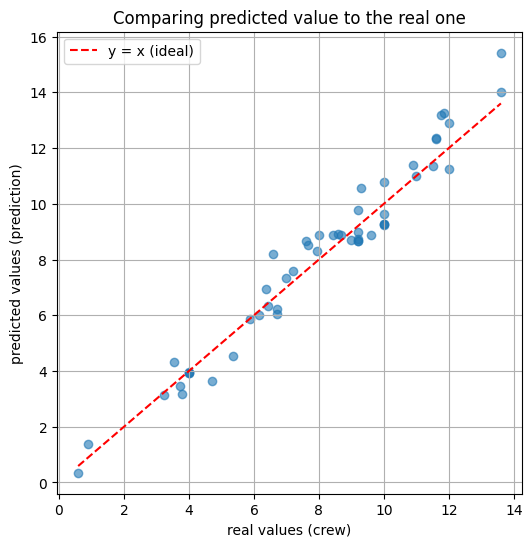

In [15]:
import matplotlib.pyplot as plt

# Create a dataFrame containing both predicted value and real one
pdf = predictions2.select("crew", "prediction").toPandas()

plt.figure(figsize=(6,6))
plt.scatter(pdf["crew"], pdf["prediction"], alpha=0.6)
plt.plot([pdf["crew"].min(), pdf["crew"].max()],
         [pdf["crew"].min(), pdf["crew"].max()],
         color='red', linestyle='--', label='y = x (ideal)')
plt.xlabel("real values (crew)")
plt.ylabel("predicted values (prediction)")
plt.title("Comparing predicted value to the real one")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
spark.stop()